# Clothing Try-On AI

This notebook allows you to try on clothes virtually using an AI model. Follow the instructions in each cell to input your images and see the results.


# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Installing Dependencies

In [ ]:
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-c_uh2t4m
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-c_uh2t4m
  Resolved https://github.com/facebookresearch/detectron2.git to commit a59f05630a8f205756064244bf5beb8661f96180
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6147739 sha256=368c2f71401174da0ab4f10adba40

# Traversing into the Google Drive folder

In [ ]:
%cd /content/drive/MyDrive/TryOn

/content/drive/MyDrive/TryOn


# Removing residues of previous run

In [ ]:
!rm data.json origin.jpg resized_img.jpg resized_segmentation_img.png resized_segmentation_img_gray.png seg_img.png /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/openpose_json/00001_00_keypoints.json /content/drive/MyDrive/TryOn/static/cloth_web.jpg /content/drive/MyDrive/TryOn/static/finalimg.png /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/cloth/00001_00.jpg /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/cloth-mask/00001_00.jpg /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/image/00001_00.jpg /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/image-densepose/00001_00.jpg /content/drive/MyDrive/TryOn/HR-VITON-main/test/test/image-parse-v3/00001_00.png /content/drive/MyDrive/TryOn/HR-VITON-main/Output/00001_00_00001_00.png

rm: cannot remove 'data.json': No such file or directory
rm: cannot remove 'origin.jpg': No such file or directory
rm: cannot remove 'resized_img.jpg': No such file or directory
rm: cannot remove 'resized_segmentation_img.png': No such file or directory
rm: cannot remove 'resized_segmentation_img_gray.png': No such file or directory
rm: cannot remove 'seg_img.png': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TryOn/HR-VITON-main/test/test/openpose_json/00001_00_keypoints.json': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TryOn/static/cloth_web.jpg': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TryOn/static/finalimg.png': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TryOn/HR-VITON-main/test/test/cloth/00001_00.jpg': No such file or directory
rm: cannot remove '/content/drive/MyDrive/TryOn/HR-VITON-main/test/test/cloth-mask/00001_00.jpg': No such file or directory
rm: cannot remove '/content/driv

# Inputting the cloth image

In [ ]:
import os
import shutil
from google.colab import files

input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.rename(input_path, input_dir+'/cloth_web.jpg')

Saving cloth.jpg to cloth.jpg


# Inputting the model image

In [ ]:
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.rename(input_path, input_dir+'/origin_web.jpg')

Saving model.jpg to model.jpg


# Previewing the chosen images before running

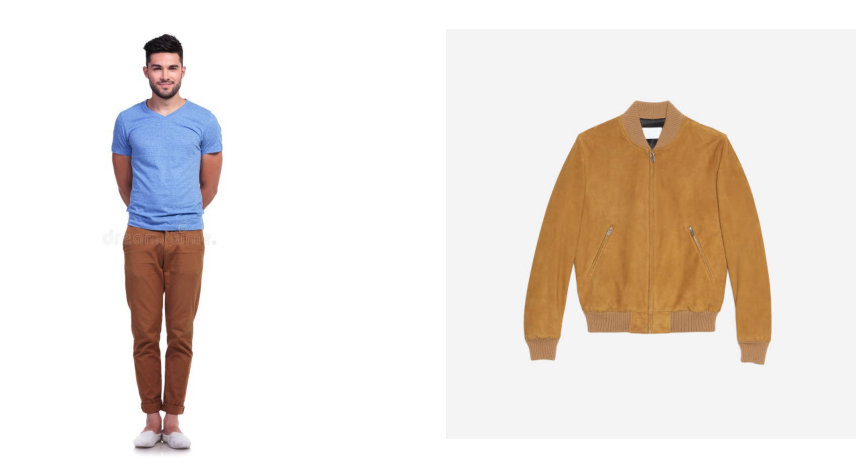

In [ ]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# Executing the main module

In [ ]:
!python main.py #--background False

Reading input image...

Resizing input image...

Getting mask of cloth...

Getting openpose coordinate using posenet...

Generating semantic segmentation using Graphonomy library...

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
Loading model: ./inference.pth
Time used for the multi-scale image inference is :1.304377580000164
Removing background image using semantic segmentation mask...

Generating grayscale semantic segmentation image...

Generating Densepose image using detectron2 library...

[04/18 04:44:52 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[04/18 04:44:52 apply_net]: Loading model from ./model_final_162be9.pkl
[04/18 04:44:55 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../

# Displaying the final output image

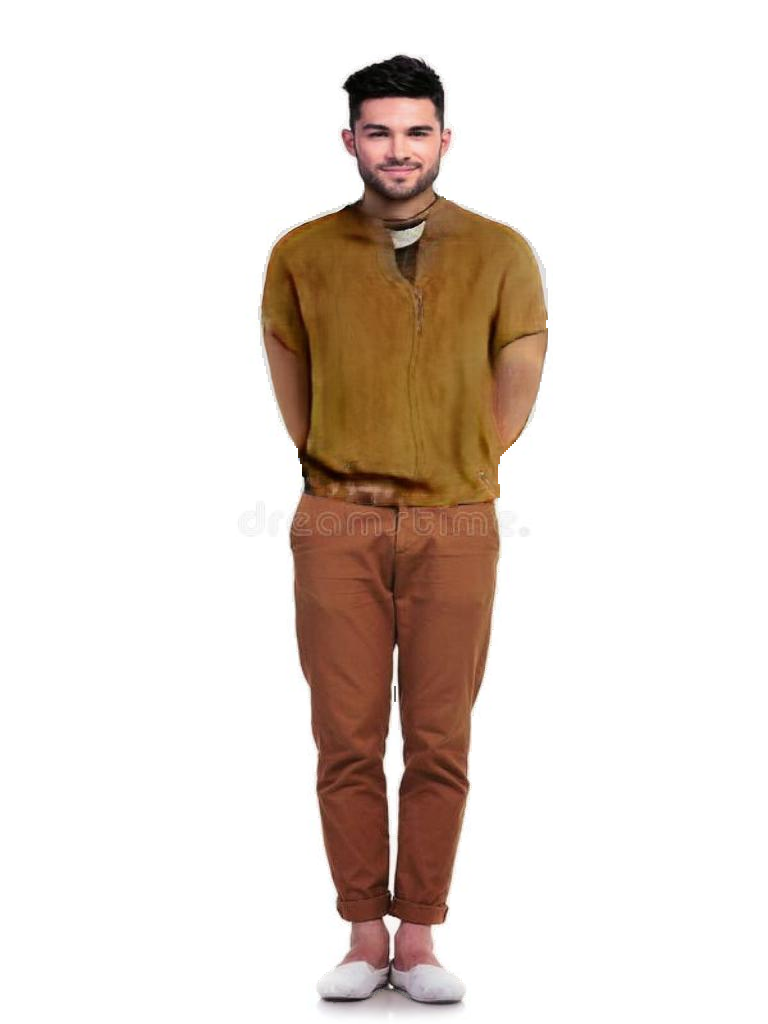

In [ ]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)